# K Nearest neighbours

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [9]:
df = pd.read_csv("Classified Data")
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


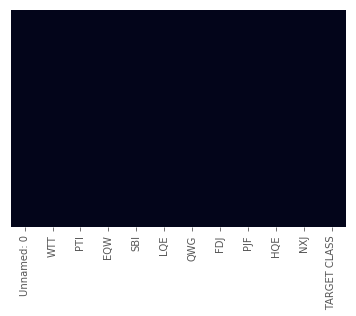

In [6]:
sns.heatmap(df.isnull(), yticklabels= False, cbar = False)
#no null values

In [16]:
from sklearn.preprocessing import StandardScaler
sclar = StandardScaler()

In [21]:
sclar.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
sclar_feature = sclar.transform(df.drop("TARGET CLASS",  axis = 1))

In [28]:
daf = pd.DataFrame(sclar_feature, columns=df.columns[:-1])
daf.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 9)

In [55]:
X = daf
y = df['TARGET CLASS']

In [56]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [58]:
prediction = knn.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

             precision    recall  f1-score   support

          0       0.95      0.88      0.91       121
          1       0.89      0.96      0.93       129

avg / total       0.92      0.92      0.92       250

[[106  15]
 [  5 124]]


In [75]:
error_rate  = list()

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [76]:
error_rate

[0.112,
 0.096000000000000002,
 0.075999999999999998,
 0.071999999999999995,
 0.087999999999999995,
 0.068000000000000005,
 0.084000000000000005,
 0.068000000000000005,
 0.080000000000000002,
 0.080000000000000002,
 0.087999999999999995,
 0.064000000000000001,
 0.080000000000000002,
 0.059999999999999998,
 0.075999999999999998,
 0.064000000000000001,
 0.064000000000000001,
 0.064000000000000001,
 0.064000000000000001,
 0.056000000000000001,
 0.064000000000000001,
 0.056000000000000001,
 0.068000000000000005,
 0.059999999999999998,
 0.080000000000000002,
 0.075999999999999998,
 0.075999999999999998,
 0.068000000000000005,
 0.080000000000000002,
 0.075999999999999998,
 0.075999999999999998,
 0.075999999999999998,
 0.080000000000000002,
 0.071999999999999995,
 0.084000000000000005,
 0.075999999999999998,
 0.075999999999999998,
 0.064000000000000001,
 0.080000000000000002,
 0.071999999999999995,
 0.080000000000000002,
 0.080000000000000002,
 0.080000000000000002,
 0.080000000000000002,
 0.

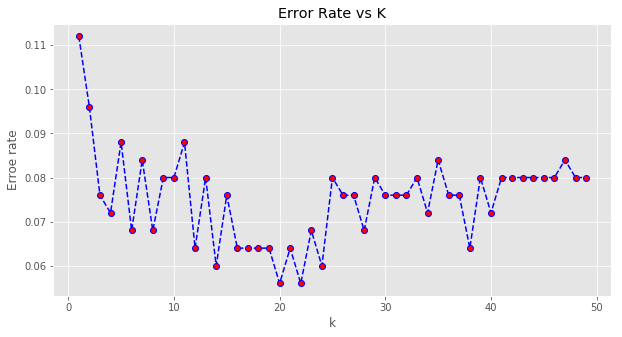

In [87]:
plt.figure(figsize =(10, 5))
plt.plot(range(1, 50), error_rate, ls = '--', color = 'blue',  marker = 'o', markerfacecolor = 'red')
plt.title("Error Rate vs K")
plt.xlabel("k")
plt.ylabel("Erroe rate")


we can chose the k value with least error from the above plot